In [55]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as pp
# import folium
import json
# import pydeck as pdk
# import geopandas as gpd
# Í∑∏ÎûòÌîÑÎ•º ÎÖ∏Ìä∏Î∂Å ÏïàÏóê Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ ÏÑ§Ï†ï
%matplotlib inline

# ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄÏôÄ ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Í∞ÄÏ†∏Ïò¥
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from IPython.display import set_matplotlib_formats

# Í∑∏ÎûòÌîÑÏóêÏÑú ÎßàÏù¥ÎÑàÏä§ Ìè∞Ìä∏ Íπ®ÏßÄÎäî Î¨∏Ï†úÏóê ÎåÄÌïú ÎåÄÏ≤ò
mpl.rcParams['axes.unicode_minus'] = False
print ('Î≤ÑÏ†Ñ: ', mpl.__version__)
print ('ÏÑ§Ïπò ÏúÑÏπò: ', mpl.__file__)
print ('ÏÑ§Ï†ï ÏúÑÏπò: ', mpl.get_configdir())
print ('Ï∫êÏãú ÏúÑÏπò: ', mpl.get_cachedir())
print ('ÏÑ§Ï†ï ÌååÏùº ÏúÑÏπò: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf Ìè∞Ìä∏ Ï†ÑÏ≤¥Í∞úÏàò
print(len(font_list))
# font_list_mac = fm.()
# print(len(font_list_mac))
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10Í∞úÏùò Ìè∞Ìä∏ Î™Ö Îßå Ï∂úÎ†•
# print(fm.fontManager.ttflist)
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]
# path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)
set_matplotlib_formats('retina')
plt.rcParams['font.family'] = 'AppleGothic'

Î≤ÑÏ†Ñ:  3.2.1
ÏÑ§Ïπò ÏúÑÏπò:  /Users/dhkim/PycharmProjects/untitled/venv/lib/python3.8/site-packages/matplotlib/__init__.py
ÏÑ§Ï†ï ÏúÑÏπò:  /Users/dhkim/.matplotlib
Ï∫êÏãú ÏúÑÏπò:  /Users/dhkim/.matplotlib
ÏÑ§Ï†ï ÌååÏùº ÏúÑÏπò:  /Users/dhkim/PycharmProjects/untitled/venv/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc
328
328
DejaVu Sans


In [56]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
# from konlpy.tag import Twitter
from collections import Counter


In [57]:
names = ['ÏûëÏÑ±ÏãúÍ∞Ñ','ÏûëÏÑ±Ïûê','ÏúÑÏπò','ÎÇ¥Ïö©','Ï¢ãÏïÑÏöîÏàò','Ìï¥Ïâ¨ÌÉúÍ∑∏']
crawling_data = pd.read_csv('Ïó¨ÏùòÎèô.txt', sep="\t", names=names)
# crawling_data = pd.read_csv('ÏÑúÍµêÎèô_Ï§ëÎ≥µÏ†úÍ±∞.txt', sep="\t", header=0)
crawling_data.tail(5)
print(crawling_data.shape)

(628, 6)


In [9]:
crawling_data2 = pd.read_csv('Ïó¨ÏùòÎèÑÏó≠.txt', sep="\t", names=names)
crawling_data2.shape

(401, 6)

In [7]:
crawling_data = crawling_data.drop_duplicates()
crawling_data.shape
crawling_data.to_csv("Ïó¨ÏùòÎèô_Ï§ëÎ≥µÏ†úÍ±∞.txt",sep="\t")

In [11]:
crawling_data2 = crawling_data2.drop_duplicates()
print(crawling_data2.shape)
crawling_data2.to_csv("Ïó¨ÏùòÎèÑÏó≠_Ï§ëÎ≥µÏ†úÍ±∞.txt",sep="\t")

(311, 6)


In [15]:
crawling_data3 = pd.concat([crawling_data, crawling_data2])
crawling_data3.shape
crawling_data3.to_csv("Ïó¨ÏùòÎèô_Ïó¨ÏùòÎèÑÏó≠.txt",sep="\t")

In [17]:
crawling_data3.shape
crawling_data = crawling_data3

In [18]:
timedata = crawling_data['ÏûëÏÑ±ÏãúÍ∞Ñ']
day_data = timedata.str.slice(stop=10)
hour = timedata.str.slice(start=11,stop=-11)
year = day_data.str.slice(stop=4)
month = day_data.str.slice(start=5,stop=7)
day = day_data.str.slice(start=8,stop=10)
post_crawl = crawling_data.copy()
post_crawl['year'] = year
post_crawl['month'] = month
post_crawl['day'] = day
post_crawl['hour'] = hour
post_crawl = post_crawl[['year','month','ÏûëÏÑ±Ïûê','hour','ÏúÑÏπò','Ìï¥Ïâ¨ÌÉúÍ∑∏','Ï¢ãÏïÑÏöîÏàò']]
# daydata = timedata

In [19]:
def process_hash_tag(df):
    df["Ìï¥Ïâ¨ÌÉúÍ∑∏"] = df["Ìï¥Ïâ¨ÌÉúÍ∑∏"].str.split("_") 
    results = []
    for row in df['Ìï¥Ïâ¨ÌÉúÍ∑∏']:
#         print(row)
        if row is np.nan:
            results.append(0)
        else:
            temp = []
            for x in row:
                try:
                    if len(x)>0 and x[0]=="#":
                        temp.append(x[1:])
                except SyntaxError:
                    temp.append(x)
            if temp == []:
                temp =0
            results.append(temp)
    df['Ìï¥Ïâ¨ÌÉúÍ∑∏'] = results


In [20]:
process_hash_tag(post_crawl)
post_crawl

year month               ÏûëÏÑ±Ïûê hour       ÏúÑÏπò  \
0    2018    06          88.11.02   03  Ïó¨ÏùòÎèôÏ£ºÎØºÏÑºÌÑ∞   
1    2017    05          felixsuh   05  Ïó¨ÏùòÎèôÏ£ºÎØºÏÑºÌÑ∞   
2    2017    05      gorgeoushong   07  Ïó¨ÏùòÎèôÏ£ºÎØºÏÑºÌÑ∞   
3    2017    06        infaco_min   13  Ïó¨ÏùòÎèôÏ£ºÎØºÏÑºÌÑ∞   
4    2017    05        a_anne0513   05  Ïó¨ÏùòÎèôÏ£ºÎØºÏÑºÌÑ∞   
..    ...   ...               ...  ...      ...   
362  2020    05        gwangjun_2   05     Ïó¨ÏùòÎèÑÏó≠   
367  2018    09          babebani   09  Yeouido   
377  2020    05       dami_duomei   10     Ïó¨ÏùòÎèÑÏó≠   
383  2020    04  aruhi_specialday   02     Ïó¨ÏùòÎèÑÏó≠   
399  2019    02          thug_min   04     Ïó¨ÏùòÎèÑÏó≠   

                                                  Ìï¥Ïâ¨ÌÉúÍ∑∏   Ï¢ãÏïÑÏöîÏàò  
0                                                    0     70  
1                                                    0     74  
2                                                 [ÏÑ†Í±∞]    107  
3                     [ÏåàÎßàÏù¥Ïõ®Ïù¥, ÎìúÎùºÎßà, Ï¥¨ÏòÅÏ§ë, Ïó¨ÏùòÎèÑ, ÍπÄÏ£ºÎßå, Î∞±ÏÑ§Ìù¨]    147  
4           [ÎåÄÌÜµÎ†πÏÑ†Í±∞, ÏÇ¨Ï†ÑÌà¨Ìëú, Ïó¨ÏùòÎèôÏ£ºÎØºÏÑºÌÑ∞, ÏÑ†Í±∞, Ìà¨Ìëú, Ìà¨ÌëúÏù∏Ï¶ù, vote]     59  
..                                                 ...    ...  
362  [Ïò§Îäò, ÎÇ†Ïî®, ÎçîÏõÄ, Í∑ºÎ°úÏûêÏùòÎÇ†, ÎÇòÎäî, Ïùº, Ï¥¨ÏòÅ, ÎÇ¥Î¶ºÎ®∏Î¶¨, ÏΩîÎ°úÎÇò, ÍΩÉÍ∞ÄÎ£®,...     51  
367                                                  0    NaN  
377                                                  0     36  
383  [ÏïÑÎ£®Ìûà, Ïä§ÏãúÏïÑÎ£®Ìûà, ÏïÑÎ£®ÌûàÍ∞ÄÏïÑÎ£®ÌûàÎãµÍ≤å, ÎÑàÏùòÏÇ¨ÎûëÎÇòÏùòÏÇ¨ÎûëÏïÑÎ£®Ìûà, Ïó¨Ï†ÑÌûàÏñ∏Ï†úÎÇòÏïÑÎ£®Ìûà...    363  
399                                       [Î¨∏Ï†ïÏóêÏä§ÌÖåÌã±, ÎßåÏÑ∏]  3,560  

[922 rows x 7 columns]

In [39]:
tag_post = post_crawl[post_crawl["Ìï¥Ïâ¨ÌÉúÍ∑∏"]!=0]
print(tag_post.shape)
tags = tag_post["Ìï¥Ïâ¨ÌÉúÍ∑∏"]

(608, 7)


In [71]:
all_tags = np.concatenate(np.array(tags))
post_all_tags = []
for tag in all_tags:
    if ("Ïù∏Ïä§ÌÉÄÍ∑∏Îû®" in tag) or ("Ïù∏Ïä§ÌÉÄ" in tag) or ("ÏÑúÍµêÎèô" in tag) or ("ÌôçÎåÄ" in tag) or ("ÎßûÌåî" in tag) or (tag=="ÏÜåÌÜµ") and not ("Îç∞Ïù¥Ìä∏" in tag):
        continue
    elif ("ÏÑ†Ìåî" in tag) or (tag=="Ï¢ãÏïÑÏöî") or ("like" in tag) or ("ÌåîÎ°úÏûâ" in tag) or ("ÏÖÄÌîº" in tag) or ("ÏÖÄÏπ¥" in tag) or ("Ï¢ãÌäÄ" in tag) or ("ÎåìÍ∏Ä" in tag) or ("f4f" in tag):
        continue
        
    elif ("selfie" in tag) or ("selca" in tag) or ("follow" in tag) or (tag=="daily") or (tag=="ÏùºÏÉÅ") or (tag=="ÏÑ†ÌåîÌïòÎ©¥ÎßûÌåî") or ("ÌåîÎ°úÏö∞" in tag) or ("Ï¢ãÏïÑÏöîÎ∞òÏÇ¨"==tag):
        continue
    elif ("Ïó∞ÎÇ®" in tag) or ("Ìï©Ï†ï" in tag) or("Ï¢ãÏïÑÏöîÎ∞òÏÇ¨"==tag) or ("ÎßõÏßë" in tag)  or ("ÎßùÏõêÎèô" in tag):
        continue
    elif ("ÏùºÏÉÅ" in tag) or ("Îç∞ÏùºÎ¶¨" in tag):
        continue
    elif "Îèô" in tag:
        continue
    elif "Î∞ïÏäπÏ≤†" in tag:
        continue
    elif "Ïä§ÌÉÄÍ∑∏Îû®" in tag:
#         print(tag)
        newtag = "".join(tag.split("Ïä§ÌÉÄÍ∑∏Îû®"))
        if len(newtag)==1:
            newtag = tag
#         print(newtag)
    elif ("Ïä§ÌÉÄ" in tag) and ("ÎûçÏä§ÌÉÄ" not in tag) and ("ÌååÏä§ÌÉÄ" not in tag) and ("Ïä§ÌÉÄÏùº" not in tag):
#         print(tag)
        newtag = "".join(tag.split("Ïä§ÌÉÄ"))
        if len(newtag)==1:
            newtag = tag
#         print(newtag)
    elif "Í∑∏Îû®" in tag:
#         print(tag)
        newtag = "".join(tag.split("Í∑∏Îû®"))
        if len(newtag)==1:
            newtag = tag
#         print(newtag)
    else:
        newtag = tag
    post_all_tags.append(newtag)
post_all_tags


['ÏÑ†Í±∞',
 'ÏåàÎßàÏù¥Ïõ®Ïù¥',
 'ÎìúÎùºÎßà',
 'Ï¥¨ÏòÅÏ§ë',
 'Ïó¨ÏùòÎèÑ',
 'ÍπÄÏ£ºÎßå',
 'Î∞±ÏÑ§Ìù¨',
 'ÎåÄÌÜµÎ†πÏÑ†Í±∞',
 'ÏÇ¨Ï†ÑÌà¨Ìëú',
 'ÏÑ†Í±∞',
 'Ìà¨Ìëú',
 'Ìà¨ÌëúÏù∏Ï¶ù',
 'vote',
 '19ÎåÄÎåÄÌÜµÎ†πÏÑ†Í±∞',
 'ÏÇ¨Ï†ÑÌà¨Ìëú',
 'ÏÇ¨Ï†ÑÌà¨Ìëú',
 'Ìà¨ÌëúÏù∏Ï¶ù',
 'piginthegarden',
 'ÏïÑÎ≥¥Ïπ¥ÎèÑÏÉêÎü¨Îìú',
 'ÏóÑÍ∑ºÏßÑ',
 'ÍπêÎäê',
 'ÌòÑÏ§Ä',
 'Îã≠Îù†Îßò',
 'D',
 'Ìà¨ÌëúÏÜåÏÇ¨Î°úÏû°ÏùÄ',
 'Ïù∏Í∏∞ÏüÅÏù¥',
 'Ïû•ÌöåÏû•Îãò',
 '415Ï¥ùÏÑ†',
 'Ï†ú21ÎåÄÍµ≠ÌöåÏùòÏõêÏÑ†Í±∞',
 'ÏòÅÎì±Ìè¨ÏùÑ',
 'ÏÇ¨Ï†ÑÌà¨Ìëú',
 'ÏΩîÎ°úÎÇò19',
 'ÎßàÏä§ÌÅ¨',
 'Î∞úÏó¥Ï≤¥ÌÅ¨',
 'ÏÜêÏÑ∏Ï†ïÏ†ú',
 'ÏÇ¨ÌöåÏ†ÅÍ±∞Î¶¨',
 'Ïã†Î∂ÑÏ¶ù',
 'Ï∞çÏûêÏö∞Î¶¨415',
 'Ïó¨ÏùòÎèÑ',
 'Ï†ïÏπò1Î≤àÏßÄ',
 'Íµ≠ÌöåÏùòÏÇ¨Îãπ',
 'Íµ≠ÌöåÏùòÏõê',
 'Ìà¨ÌëúÌïòÎäîÏó∞Ï†ïÏùÄ',
 'Ï†ïÏπòÏô∏ÍµêÌïôÍ≥º',
 'Ï†ÑÏ£º',
 'Ï∞¨ÎàÑÎ¶¨Î¶¨Î¨¥ÏßÑ',
 'Ï∞¨ÎàÑÎ¶¨Ìà¨Ïñ¥',
 '28Ïù∏ÏäπÎ¶¨Î¨¥ÏßÑ',
 'Í≥µÌï≠ÏàòÏÜ°',
 'Ï†ÑÏÑ∏Î≤ÑÏä§Î¨∏Ïùò',
 'Î¨∏ÏùòÌôòÏòÅ',
 'ÏùºÍ∞úÎØ∏',
 'Ïú°ÏïÑÏÜåÌÜµ',
 'Ïú°ÏïÑ',
 'Ïù¥ÏÅúÏ≤ô',
 'Î©çÏä§ÌÉÄÍ∑∏Îû®',
 'Ï†äÏ§åÎßà',
 'Ï£ºÎ∂Ä',
 'ÎßòÏä§ÌÉÄÍ∑∏Îû®',
 'Ïú°ÏïÑ

In [72]:
len([x for x in post_all_tags if 'Ïπ¥Ìéò' in x])

85

In [73]:
# [x for x in post_all_tags if ('ÌÉÄÌà¨' in x) and not ('ÌÉÄÌà¨'==x)]
tatoo_num = len([x for x in post_all_tags if ('ÌÉÄÌà¨' in x) and not ('ÌÉÄÌà¨'==x)])

In [74]:
tatoo_num

0

In [75]:
count = Counter(post_all_tags)
words = dict(count.most_common())

In [76]:
def add_counts(keyword,words):
    new_words = words.copy()
    add_val = 0
    for key,value in words.items():
        if (keyword in key) and (keyword != key):
#             print(f'keyword : {keyword}, key : {key}')
            add_val += value
    new_words[keyword] = add_val
    return new_words

def del_word(keyword,words):
    new_words = words.copy()
    del(new_words[keyword])
    return new_words

In [77]:
new_words = add_counts("Ïπ¥Ìéò",words)
new_words = add_counts("ÎßõÏßë",new_words)
new_words = add_counts("ÏòÅÌôî",new_words)
new_words = add_counts("ÌÉÄÌà¨",new_words)
new_words = add_counts("Ïú†Ìïô",new_words)
new_words = add_counts("Îç∞Ïù¥Ìä∏",new_words)
words['Ïπ¥Ìéò']
new_words['Ïπ¥Ìéò']
# new_words

78

In [87]:
new_words2 = del_word("Ïπ¥Ìéò",words)
new_words2 = del_word("Ïª§Ìîº",new_words2)
new_words2 = del_word("Î®πÏä§ÌÉÄÍ∑∏Îû®",new_words2)
new_words2 = del_word("ÎßõÏä§ÌÉÄÍ∑∏Îû®",new_words2)
new_words2 = del_word("Ïó¨ÏùòÎèÑÎØ∏Ïö©Ïã§",new_words2)
new_words2 = del_word("ÎßàÎ£®Ïã§Ïû•",new_words2)
new_words2 = del_word("Ïó¨ÏùòÎèÑÏ†úÏò§Ìó§Ïñ¥",new_words2)
new_words2 = del_word("Ïù¥ÎßàÌä∏Ïó¨ÏùòÎèÑÏ†ê",new_words2)

# new_words2 = del_word("Ïó¨ÏùòÎèô",new_words2)
# new_words2 = del_word("ÎèôÏÇ∞Îèô",new_words2)
# new_words2 = del_word("Î∞òÏõîÎèô",new_words2)
# new_words2 = del_word("ÏÑ±ÎèÖÎèô",new_words2)
# new_words2 = del_word("Í≥†ÎûëÎèô",new_words2)
# new_words2 = del_word("Ïö©Ï†ïÎèô",new_words2)
# new_words2 = del_word("ÎßåÏÑ±Îèô",new_words2)
# new_words2 = del_word("ÏÑúÍµêÎèô",new_words2)
    

In [85]:
def draw_bar_graph(words,save_name):
    col1 = words.keys()
    col2 = words.values()

    df_words = pd.DataFrame()
    df_words['Îã®Ïñ¥'] = col1
    df_words['ÎπàÎèÑÏàò'] = col2
    top30 = df_words.nlargest(30,'ÎπàÎèÑÏàò')

    plt.figure(figsize=(23,4))
    sns.barplot(data=top30,x='Îã®Ïñ¥',y='ÎπàÎèÑÏàò')
    plt.savefig(f"{save_name}_ÎπàÎèÑÏàòÎ∂ÑÏÑù.png")

In [86]:
def draw_wordcloud(words,save_name):
    wordcloud = WordCloud(font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc',
                          background_color='white',
                          colormap = "Accent_r",
                          width=1500,
                          height=1000).generate_from_frequencies(words)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud) 
    plt.axis('off') 
    plt.show()
    plt.savefig(f"{save_name}_ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú.png")


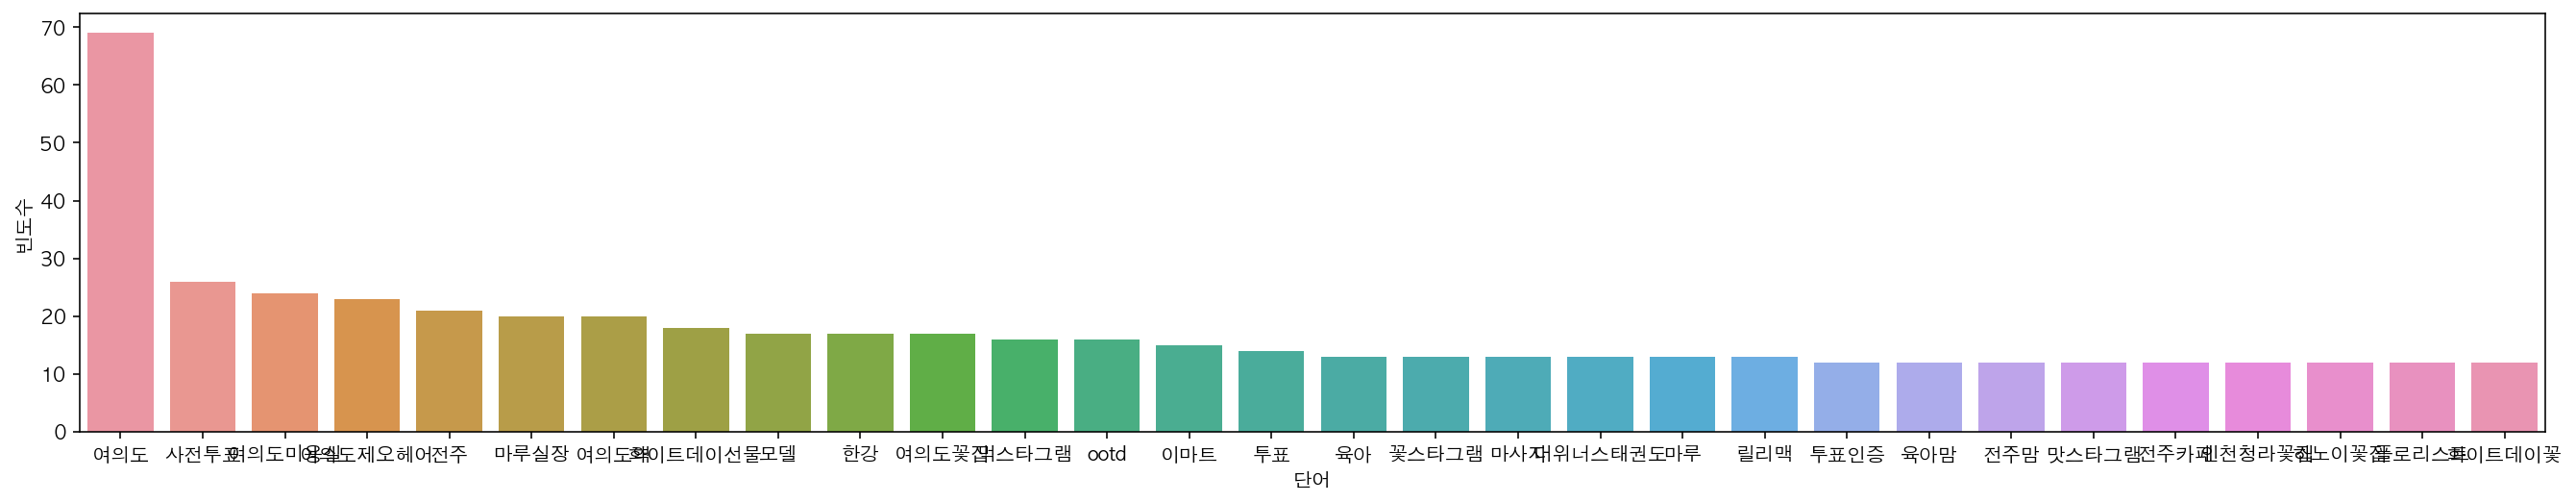

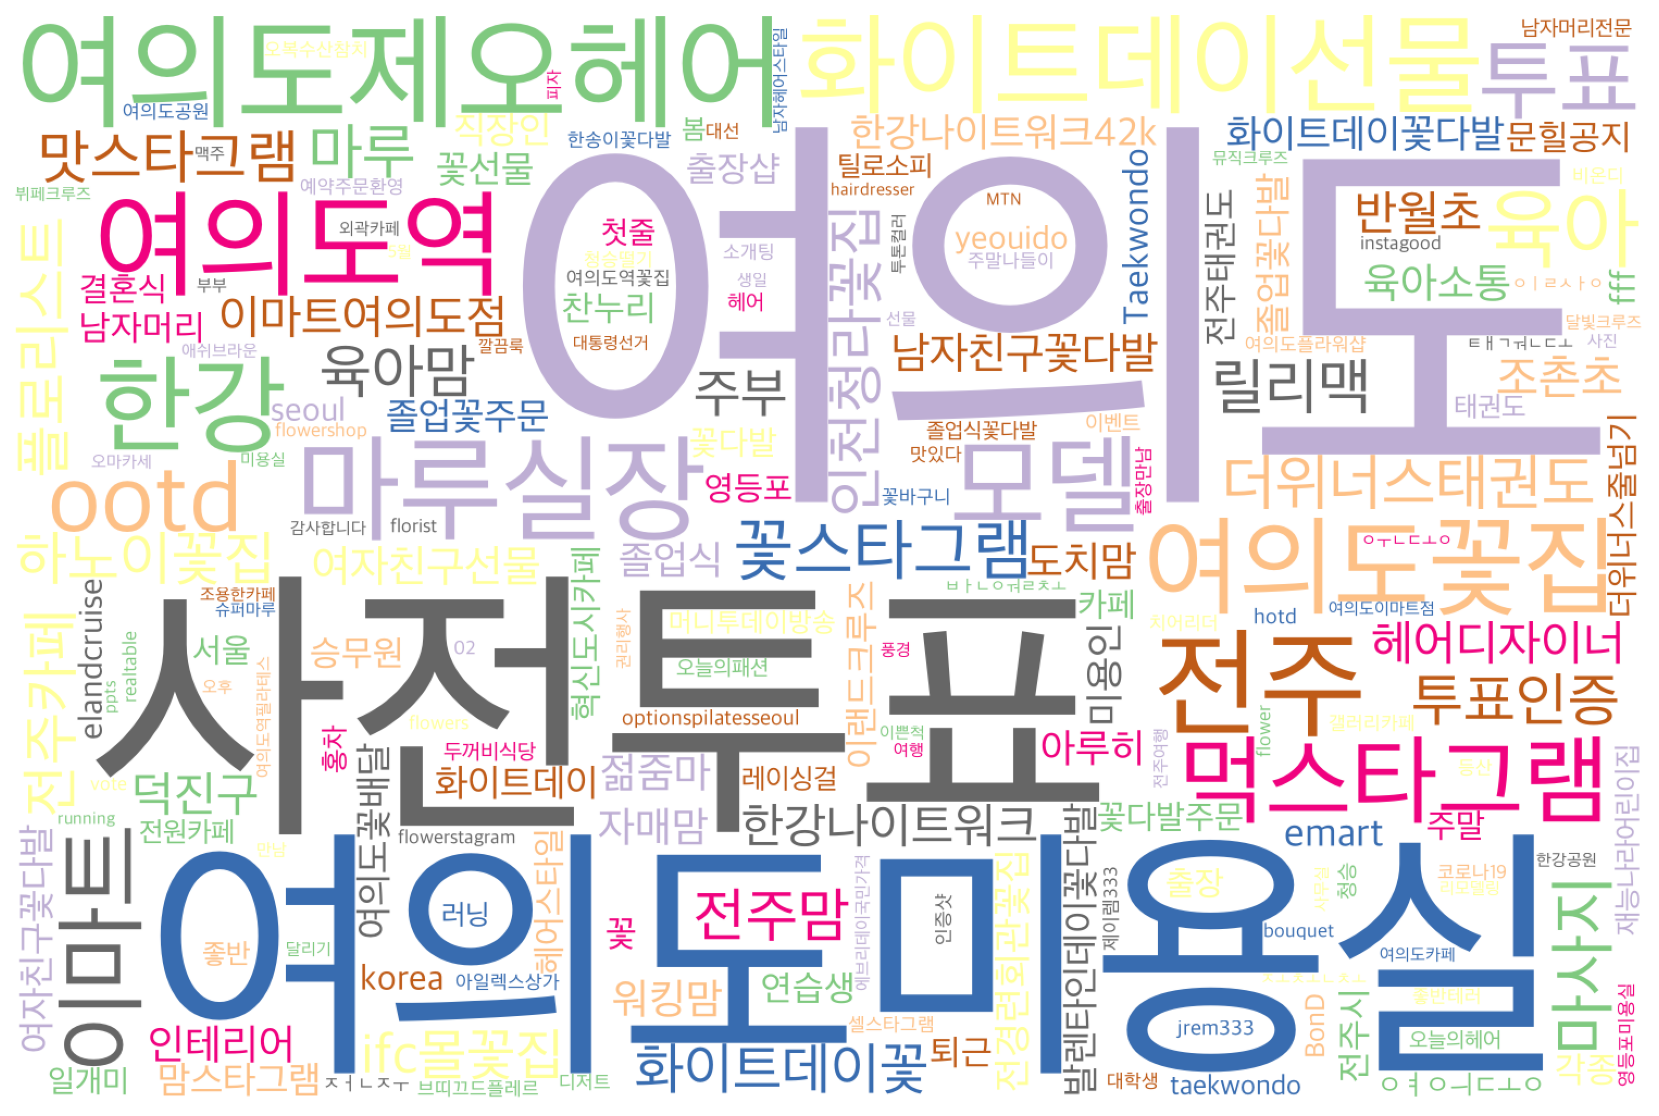

<Figure size 432x288 with 0 Axes>

In [81]:
draw_bar_graph(words,"Ïó¨ÏùòÎèÑÏùºÎåÄ")
draw_wordcloud(words,"Ïó¨ÏùòÎèÑÏùºÎåÄ")

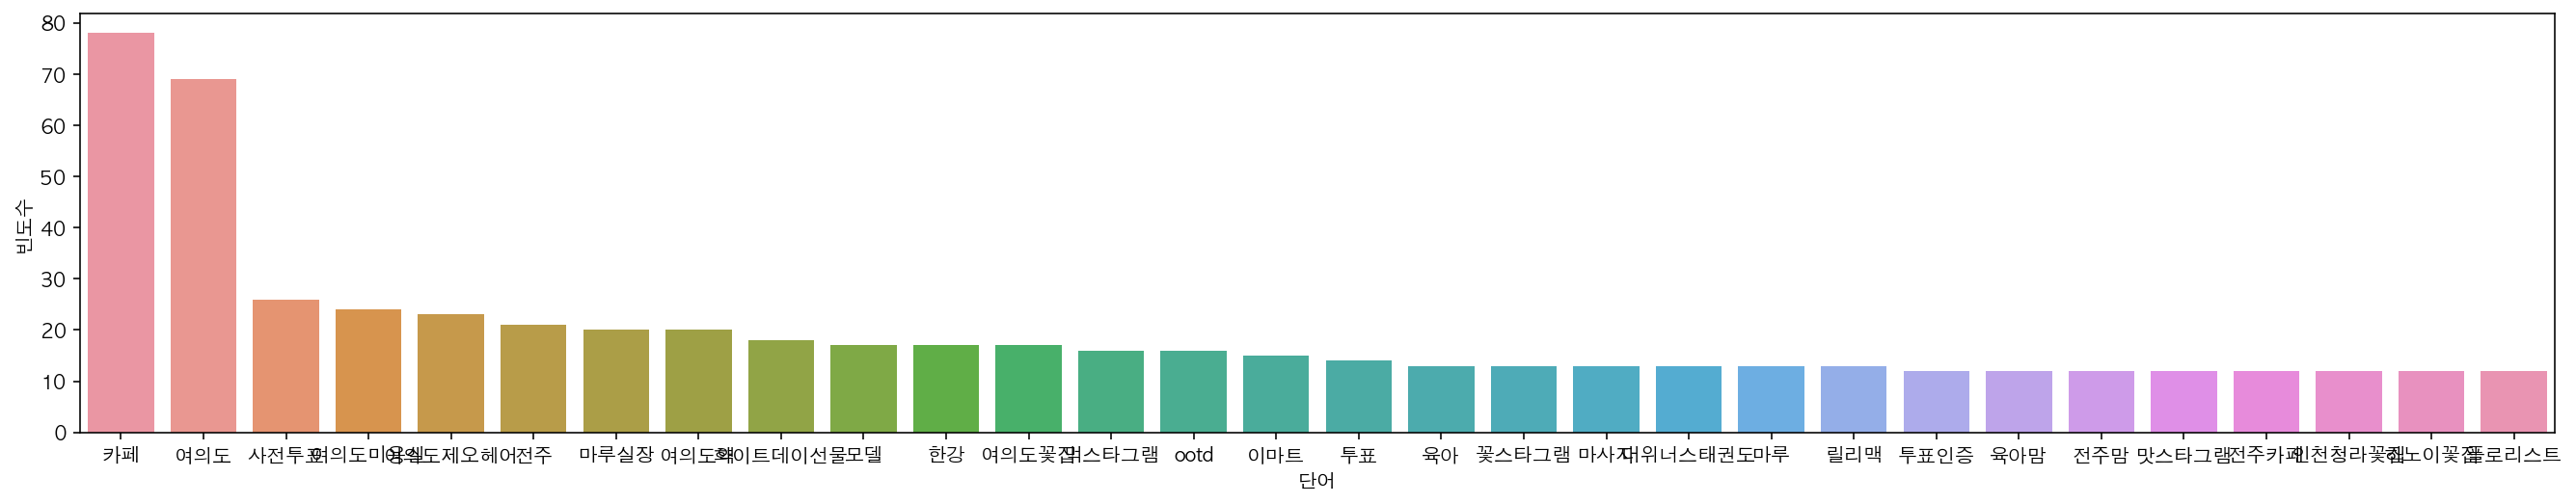

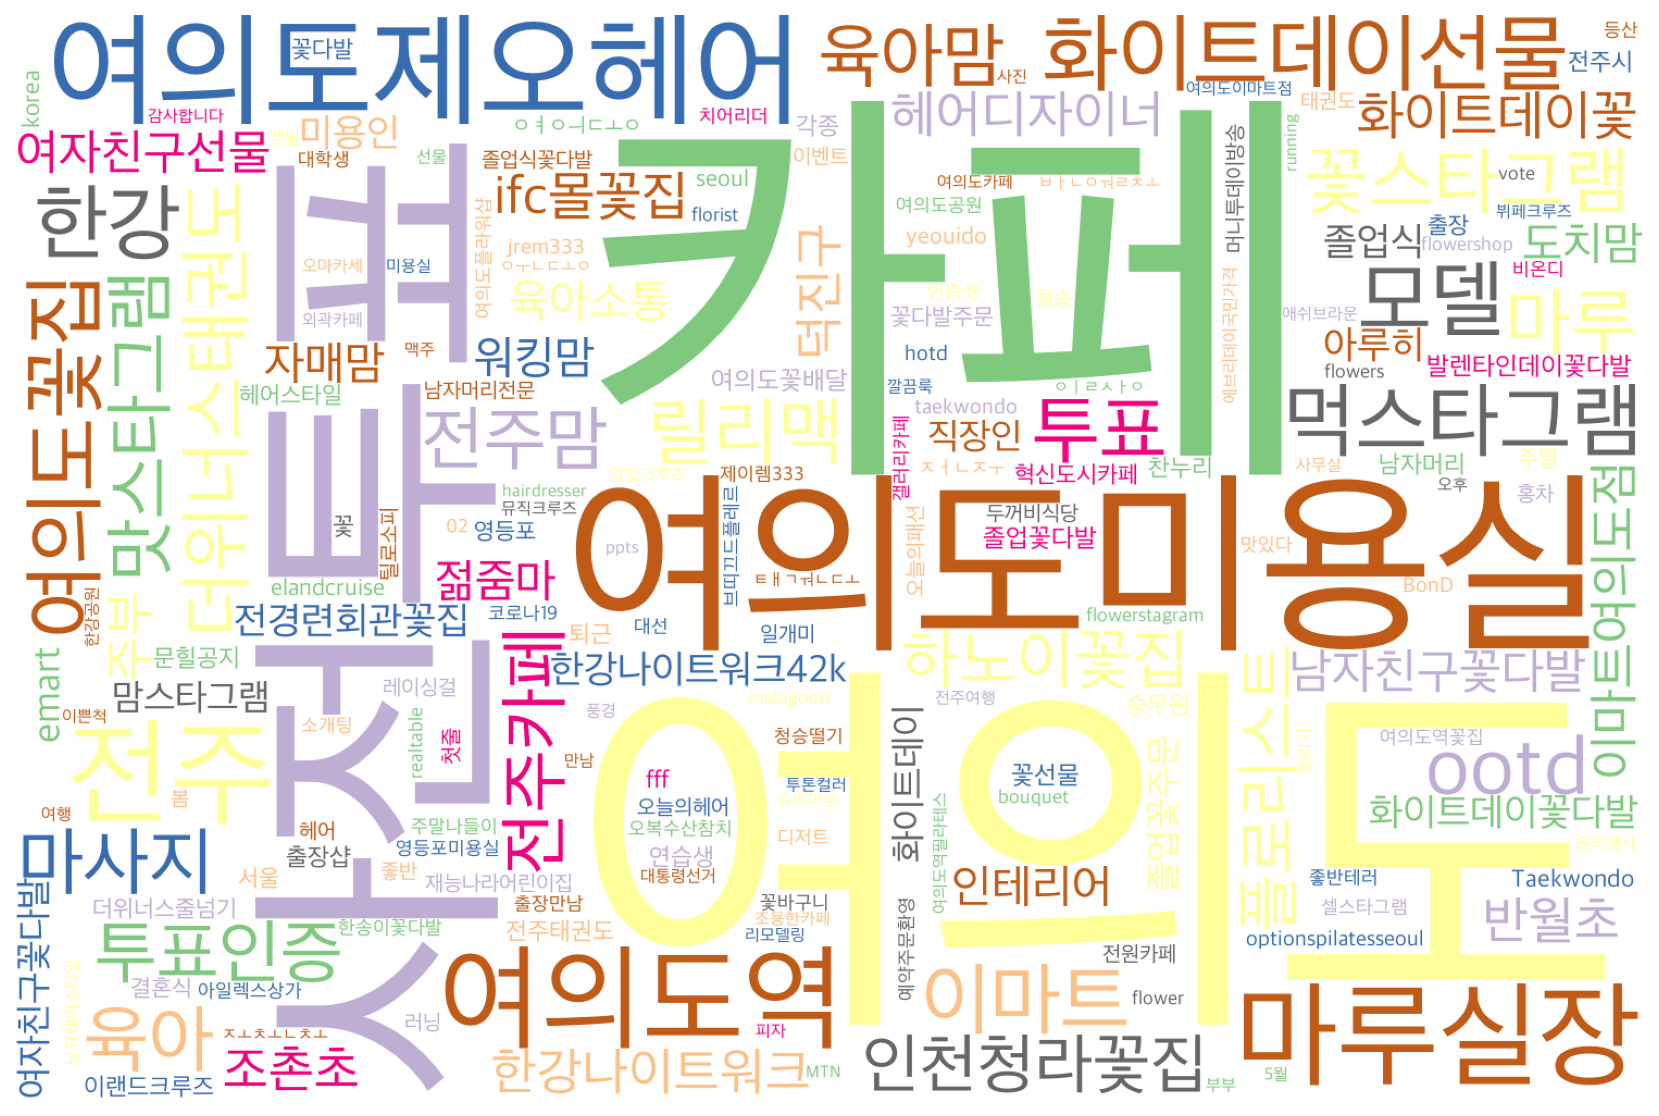

<Figure size 432x288 with 0 Axes>

In [82]:
draw_bar_graph(new_words,"Ïó¨ÏùòÎèÑÏùºÎåÄ_Îã®Ïñ¥ÏßëÍ≥Ñ")
draw_wordcloud(new_words,"Ïó¨ÏùòÎèÑÏùºÎåÄ_Îã®Ïñ¥ÏßëÍ≥Ñ")

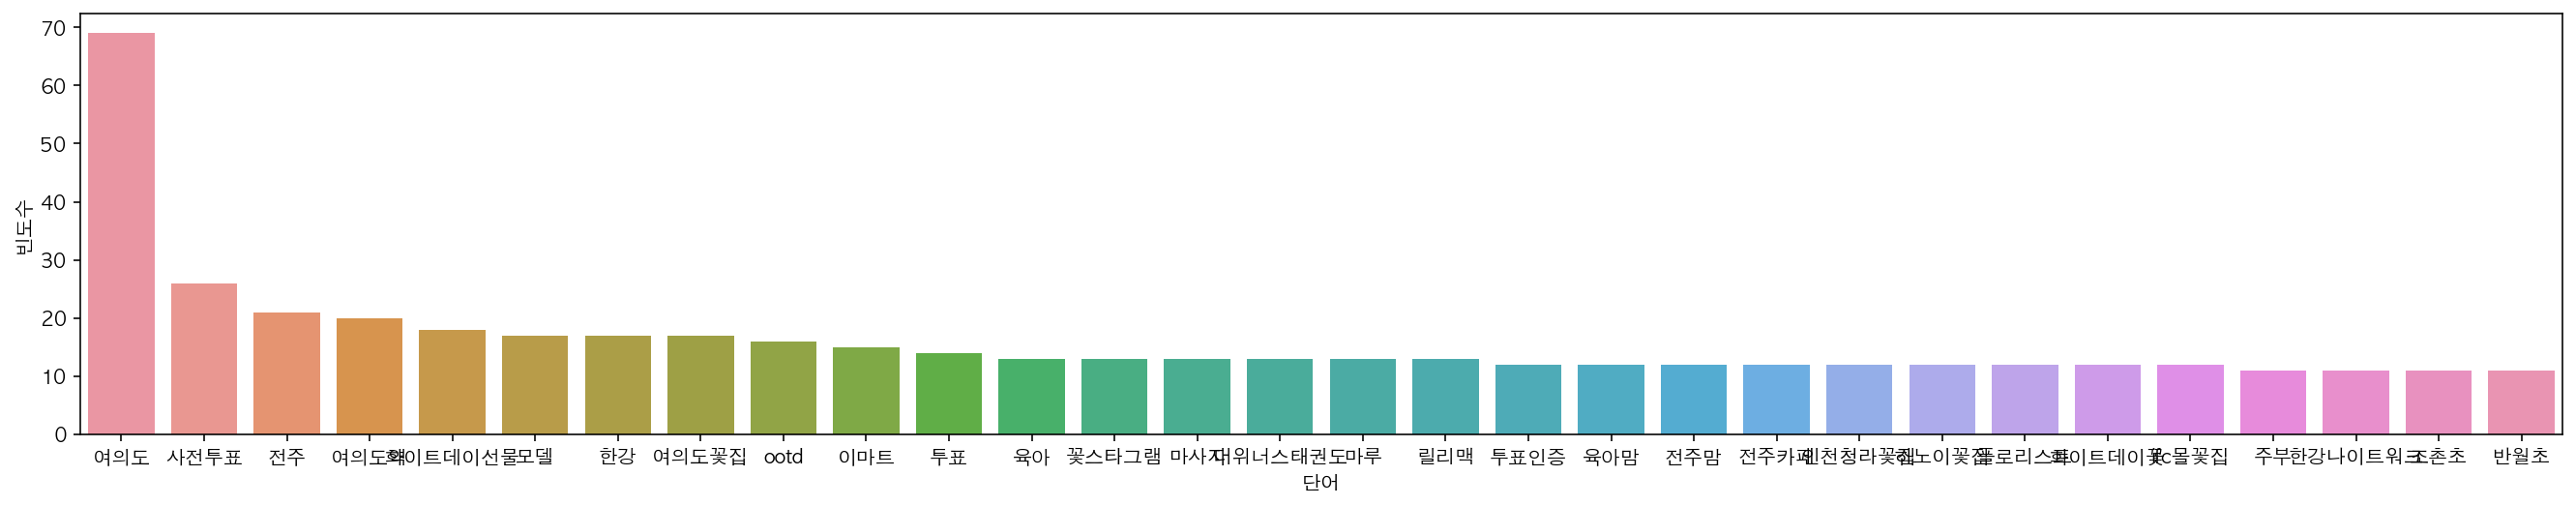

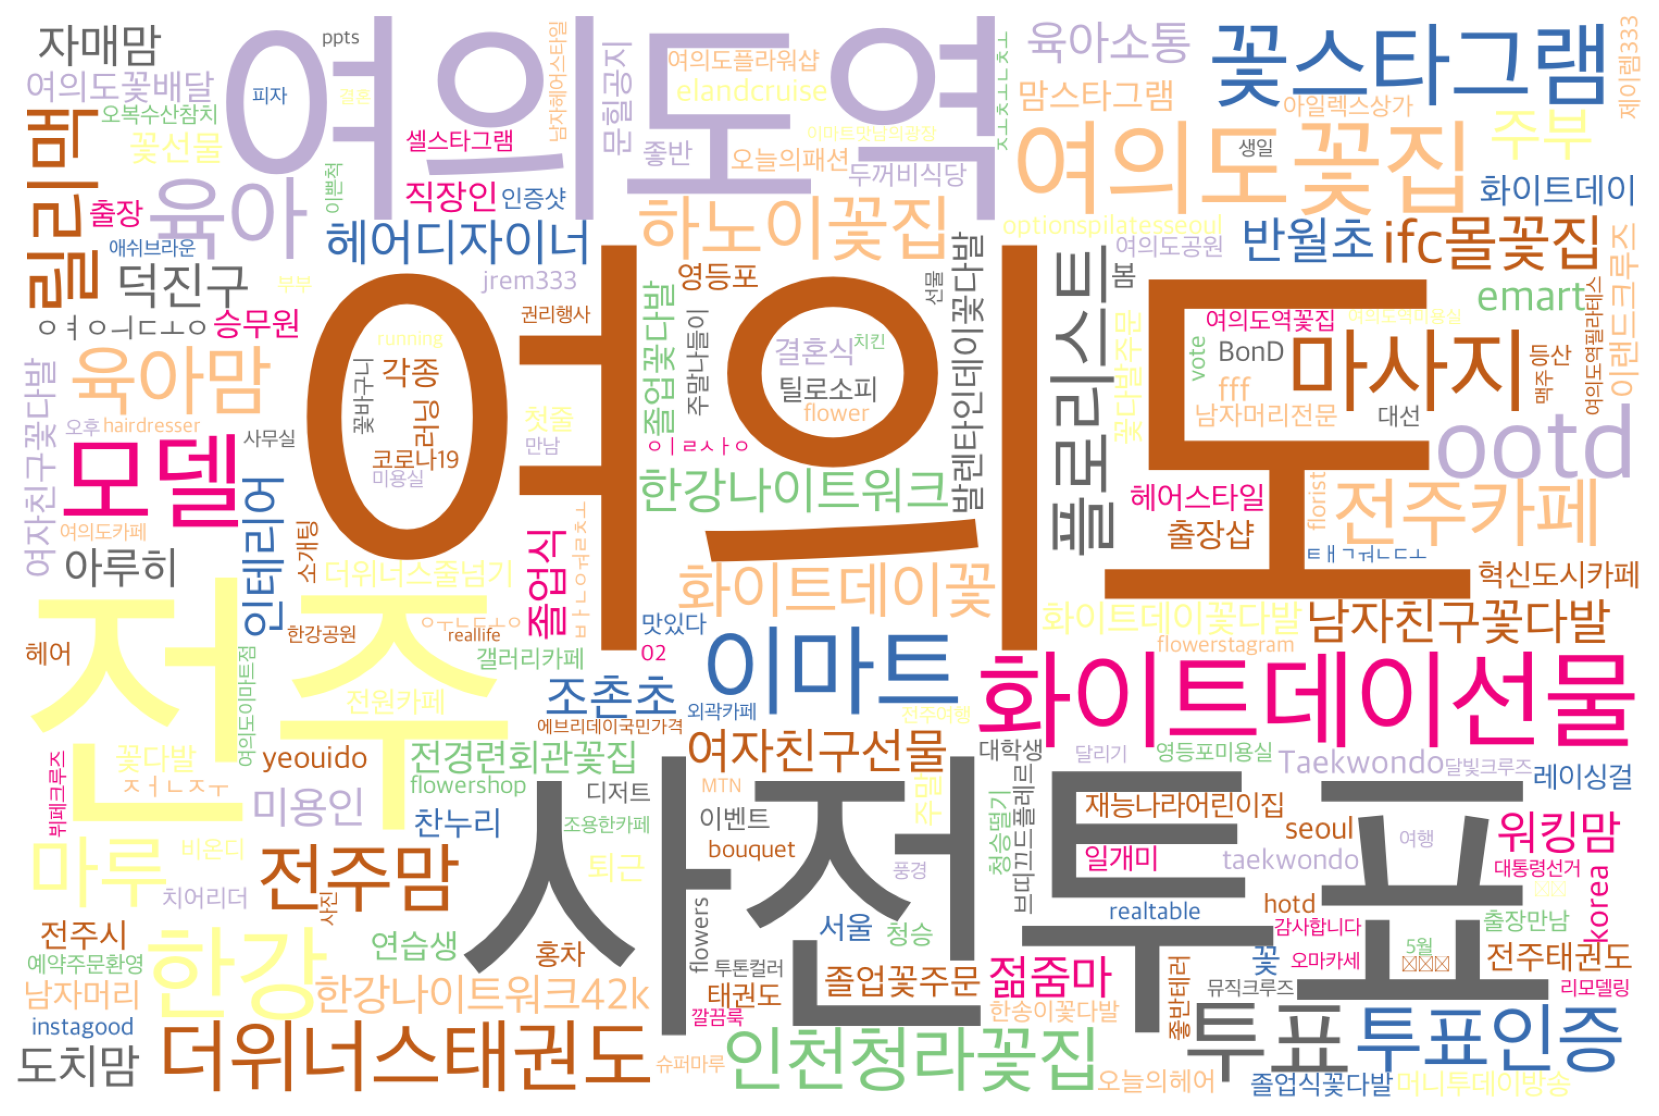

<Figure size 432x288 with 0 Axes>

In [88]:
draw_bar_graph(new_words2,"Ïó¨ÏùòÎèÑÏùºÎåÄ_ÏùºÎ∂ÄÎã®Ïñ¥Ï†úÍ±∞")
draw_wordcloud(new_words2,"Ïó¨ÏùòÎèÑÏùºÎåÄ_ÏùºÎ∂ÄÎã®Ïñ¥Ï†úÍ±∞")